# Trabalho 1 - Regressão Multivariável
# Estimativa de preços de diamantes de acordo com suas características.

UFRJ/POLI/DEL - Introdução ao Aprendizado de Máquina (EEL891)   
Prof. Heraldo Almeira - Julho de 2019  
Maria Gabriella Andrade Felgas

# Introdução

Este trabalho tem como objetivo desenvolver um modelo de regressão para estimar os preços de diamantes a partir de características específicas. Para realizá-lo, foram disponibilizados um conjunto de dados de treino, com alvo, e um conjunto de dados de teste, cujo alvo deve ser estimado, além de um modelo do arquivo a ser submetido à competição.

Cada atributo do conjunto de dados está descrito abaixo:

- **id**: Identificação única do diamante;
- **carat**: Peso em quilates (1 quilate = 0,2 g);
- **cut**: Qualidade da lapidação, em uma escala categórica ordinal com os seguinte valores: 
>- **"Fair"** = Aceitável (classificação de menor valor); 
>- **"Good"** = Boa;
>- **"Very Good"** = Muito boa;
>- **"Premium"** = Excelente;
>- **"Ideal"** = Perfeita (classificação de maior valor).
- **color**: Cor, em uma escala categórica ordinal com os seguintes valores: 
>- **"D"** = Excepcionalmente incolor extra (classificação de maior valor); 
>- **"E"** = Excepcionalmente incolor;
>- **"F"** = Perfeitamente incolor;
>- **"G"** = Nitidamente incolor; 
>- **"H"** = Incolor;
>- **"I"** = Cor levemente perceptível;
>- **"J"** = Cor perceptível (classificação de menor valor).
- **clarity**: Pureza, em uma escala categórica ordinal com os seguintes valores: 
>- **"I1"** = Inclusões evidentes com lupa de 10x (classificação de menor valor);
>- **"SI2"** e **"SI1"** = Inclusões pequenas, mas fáceis de serem visualizadas com lupa de 10x;
>- **"VS2"** e **"VS1"** = Inclusões muito pequenas e difíceis de serem visualizadas com lupa de 10x; 
>- **"VVS2"** e **"VVS1"** = Inclusões extremamente pequenas e muito difíceis de serem visualizadas com lupa de 10x;
>- **"IF"** = Livre de inclusões (classificação de maior valor).
- **x**: Comprimento em milímetros;
- **y**: Largura em milímetros;
- **z**: Profundidade em milímetros;
- **depth**: Profundidade relativa = 100 * z / mean(x,y) = 200 * z / ( x + y );
- **table**: Razão percentual entre entre a largura no topo e a largura no ponto mais largo;
- **price**: Preço do diamante, em dólares americanos.  
------------------------------------------------------------------------------------------------------------------------
**OBS:** Este documento apresenta partes com código comentado devido aos testes realizados durante o desenvolvimento do modelo. Foram mantidos para melhor compreensão da lógica utilizada e para reprodução, a quem interessar.


# Importando as Bibliotecas e Ferramentas

Para realizar este trabalho, foi necessário utilizar diversas bibliotecas disponíveis em Python:

- **Processamento e manipulação de dados:** Numpy e Pandas;
- **Visualização de dados:** Matplotlib e Seaborn;
- **Modelos de treinamento, ferramentas e métricas:** Scikit-learn.

In [1]:
# Importando as bibliotecas e setando o ambiente de desenvolvimento

# Bibliotecas para processamento e manipulacao dos dados
import numpy as np
import pandas as pd

# Bibliotecas para visualizacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas dos modelos de treinamento
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

# Bibliotecas de ferramentas e métricas
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

# Mineração e Análise de Dados

A seguir, demonstra-se o passo a passo para analisar e tratar o conjunto de dados de acordo com as observações.

### Carregando Conjunto de Treino

In [2]:
# Carregando os dados de treino como dataframe
# e observando os atributos
train = pd.read_csv('../data/train.csv')
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [3]:
# Verificando tamanho do dataframe
train.shape

(33940, 11)

In [4]:
# Verificando informacoes especificas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33940 entries, 0 to 33939
Data columns (total 11 columns):
id         33940 non-null int64
carat      33940 non-null float64
cut        33940 non-null object
color      33940 non-null object
clarity    33940 non-null object
x          33940 non-null float64
y          33940 non-null float64
z          33940 non-null float64
depth      33940 non-null float64
table      33940 non-null float64
price      33940 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.8+ MB


In [5]:
# Setando o index do arquivo como index do dataframe
train = train.set_index('id')
train.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [6]:
# Verificando se existem valores nulos para o conjunto de treino
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
price      0
dtype: int64

In [7]:
# Verificando os detalhes de cada caracteristica
train.describe()

,carat,x,y,z,depth,table,price
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000
mean,0.796249,5.727926,5.730563,3.535916,61.746491,57.467664,3920.022864
std,0.472866,1.119282,1.120279,0.693763,1.425570,2.237116,3980.229999
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,952.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2395.000000
75%,1.040000,6.540000,6.530000,4.030000,62.500000,59.000000,5294.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.000000,18823.000000


Como x, y e z são variáveis relacionadas às dimensões de cada diamante, não faz sentido que nenhuma delas seja igual a 0. Assim, é necessário retirar estes dados do conjunto de treino para que o modelo não seja prejudicado.

In [8]:
# Para realizar este processamento, redefine-se o conjunto
# de treino como todos os dados em que x, y e z sao
# diferentes de 0
train = train[(train[['x','y','z']] != 0).all(axis=1)]

# Para confirmar
train.describe()

,carat,x,y,z,depth,table,price
count,33929.000000,33929.000000,33929.000000,33929.000000,33929.000000,33929.00000,33929.000000
mean,0.796061,5.728073,5.730722,3.537062,61.746754,57.46752,3918.401692
std,0.472740,1.117848,1.118862,0.690948,1.425311,2.23705,3978.347387
min,0.200000,3.730000,3.680000,1.070000,43.000000,44.00000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.00000,952.000000
50%,0.700000,5.690000,5.710000,3.520000,61.800000,57.00000,2394.000000
75%,1.040000,6.530000,6.530000,4.030000,62.500000,59.00000,5293.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.00000,18823.000000


Como pode ser observado na tabela acima, após a remoção de zeros, o conjunto de treino apresenta valores mínimos de x, y e z acima de zero, tornando-se coerente com a aplicação.

### Carregando Conjunto de Teste

In [9]:
# Carregando os dados de teste como dataframe
test = pd.read_csv('../data/test.csv')
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [10]:
test.shape

(20000, 10)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
id         20000 non-null int64
carat      20000 non-null float64
cut        20000 non-null object
color      20000 non-null object
clarity    20000 non-null object
x          20000 non-null float64
y          20000 non-null float64
z          20000 non-null float64
depth      20000 non-null float64
table      20000 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [12]:
# Setando o index do arquivo como index do dataframe
test = test.set_index('id')
test.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [13]:
# Verificando se existem valores nulos para o conjunto de teste
test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

In [14]:
# Verificando os detalhes de cada caracteristica
test.describe()

,carat,x,y,z,depth,table
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,0.800809,5.736641,5.741252,3.543516,61.75435,57.439400
std,0.475947,1.125961,1.178295,0.725497,1.44453,2.229972
min,0.200000,0.000000,0.000000,0.000000,44.00000,43.000000
25%,0.400000,4.720000,4.730000,2.910000,61.00000,56.000000
50%,0.700000,5.700000,5.710000,3.530000,61.80000,57.000000
75%,1.050000,6.550000,6.540000,4.040000,62.50000,59.000000
max,3.670000,9.860000,58.900000,31.800000,79.00000,79.000000


Agora, verifica-se a distribuição de cada um dos atributos numéricos do dataset, verificando seus padrões e outliers.

### Tratamento de Dados

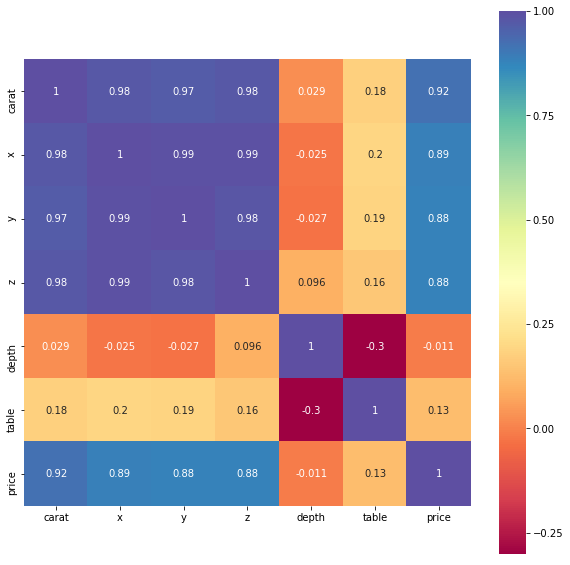

In [15]:
# Cria-se a matriz de correlacao entre os atributos
# numericos para visualizacao inicial
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

A matriz de correlação acima possui apenas os atributos numéricos do conjunto de dados, excluindo as características categóricas descritas anteriormente.  

A partir deste gráfico, é possível observar que **carat, x, y e z** são os atributos de maior correlação com o preço e, consequentemente, maior correlação entre si, já que descrevem características dependentes umas das outras, como peso, comprimento, largura e profundidade.

Define-se, então, uma função de análise, para verificar a relação de assimetria e curtose na distribuição de cada atributo numérico e para observar seu histograma, diagrama de dispersão em relação ao preço e uma função de contagem de dados até determinados limiares, configurados manualmente de acordo com o histograma.

In [16]:
# Funcao de analise de atributo
def analysis(feature, hist=True):
    '''
    Função de análise: Define os parâmetros de assimetria e curtose do atributo
    passado, plota o histograma e o diagrama de dispersão em relação ao alvo.
    
    Entrada : feature               - Atributo a ser analisado.
              hist                  - Controle de visualização do histograma, booleana.
              
    Saída   : Skewness              - Medida de assimetria da distribuição.
              Kurtosis              - Medida de curtose, quantidade de outliers.
              Histograma            - Gráfico da distribuição de dados em relação ao atributo passado.
              Diagrama de dispersão - Gráfico de dispersão do atributo em relação ao alvo.
    '''
    
    # Definindo os valores de Skewness e Kurtosis
    # para analisar a simetria e quantidade de
    # outliers respectivamente
    print('Skewness: {}'.format(train[feature].skew()))
    print('Kurtosis: {}'.format(train[feature].kurt()))

    if hist:
        # Plotando o histograma
        plt.figure(figsize=(20,10))
        train[feature].hist(bins = 500)
        plt.show()
    
    if feature != 'price':
        # Plotando o diagrama de dispersao,
        # esse grafico soh faz sentido se o
        # atributo nao for o preco
        plt.figure(figsize=(20,10))
        train.plot.scatter(x = feature, y = 'price')
        plt.show()
        
        
# Funcao que checa a contagem para cada limiar    
def count_limit(feature, inf_limit, sup_limit, hop):
    '''
    Função de contagem de dados relacionados aos limiares específicos do atributo passado.
    Calcula a porcentagem em relação ao total para cada limite.
    
    Entrada : feature     - Atributo a ser analisado.
              inf_limit   - Primeiro limite de contagem (após o zero).
              sup_limit   - Último limite de contagem (última marcação no histograma).
              hop         - Salto entre cada contagem.
              
    Saída   : Quantidade  - Quantidade de dados abaixo de cada limite.
              Porcentagem - Porcentagem de dados abaixo de cada limite.
    '''
    
    n = int((sup_limit - inf_limit) / hop)
    p = np.zeros(((n + 1), 2))
    
    for i in range(n + 1):
        p[i][0] = train[train[feature] < (inf_limit + (hop * i))][feature].count()
        p[i][1] = np.round((p[i][0] / train[train[feature] < sup_limit][feature].count()) * 100, 2)
        print('Pontos abaixo de {} :'.format(inf_limit + (hop * i)), p[i][0], \
              'Porcentagem: {} %'.format(p[i][1]))

#### Preço

In [17]:
train['price'].describe()

count    33929.000000
mean      3918.401692
std       3978.347387
min        326.000000
25%        952.000000
50%       2394.000000
75%       5293.000000
max      18823.000000
Name: price, dtype: float64

Skewness: 1.6292963158992595
Kurtosis: 2.224956771069901


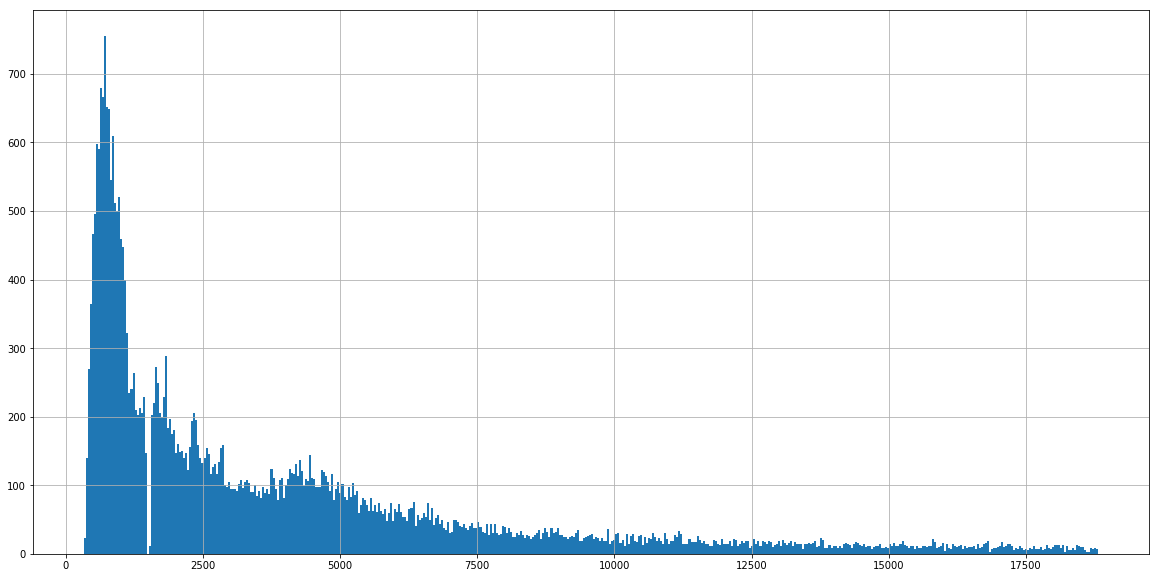

In [18]:
analysis('price')

In [19]:
count_limit('price', 2500, 20000, 2500)

Pontos abaixo de 2500 : 17381.0 Porcentagem: 51.23 %
Pontos abaixo de 5000 : 24717.0 Porcentagem: 72.85 %
Pontos abaixo de 7500 : 28734.0 Porcentagem: 84.69 %
Pontos abaixo de 10000 : 30664.0 Porcentagem: 90.38 %
Pontos abaixo de 12500 : 31976.0 Porcentagem: 94.24 %
Pontos abaixo de 15000 : 32881.0 Porcentagem: 96.91 %
Pontos abaixo de 17500 : 33630.0 Porcentagem: 99.12 %
Pontos abaixo de 20000 : 33929.0 Porcentagem: 100.0 %


##### Removendo os Outliers

Como o preço é o alvo a ser estimado pelo modelo, não faz sentido remover nenhum valor específico.

#### Carat

In [20]:
train['carat'].describe()

count    33929.000000
mean         0.796061
std          0.472740
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Skewness: 1.1315062541047431
Kurtosis: 1.4017522300920007


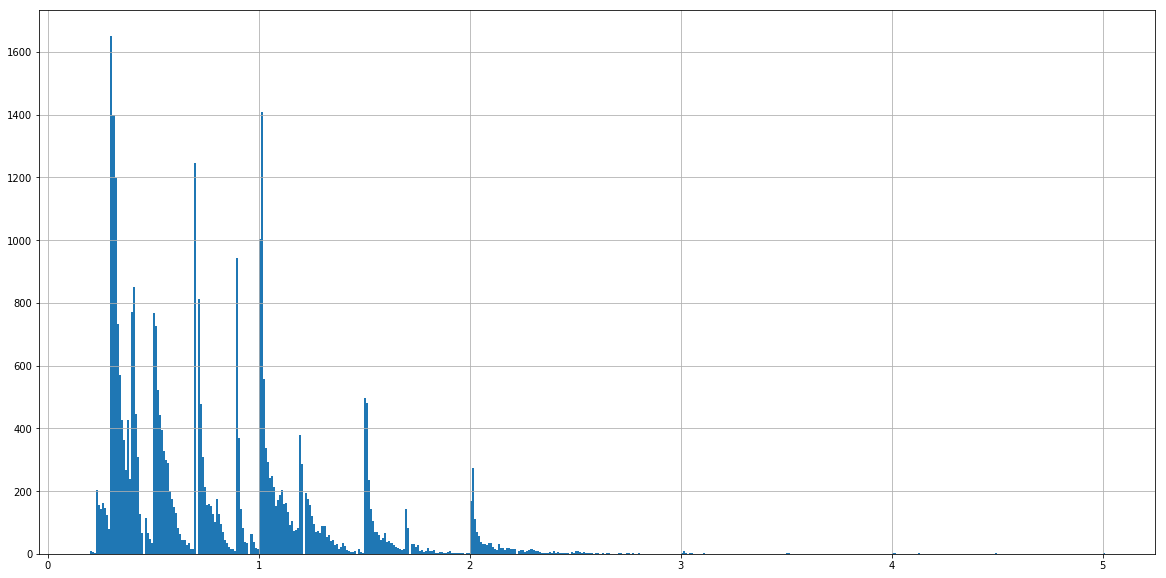

<Figure size 1440x720 with 0 Axes>

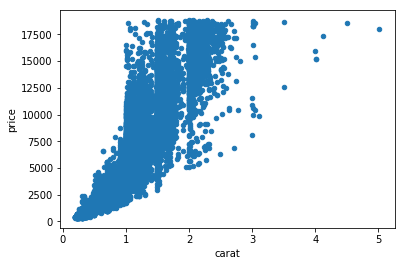

In [21]:
analysis('carat')

In [22]:
count_limit('carat', 0.5, 3, 0.5)

Pontos abaixo de 0.5 : 11121.0 Porcentagem: 32.8 %
Pontos abaixo de 1.0 : 21961.0 Porcentagem: 64.77 %
Pontos abaixo de 1.5 : 30074.0 Porcentagem: 88.7 %
Pontos abaixo de 2.0 : 32589.0 Porcentagem: 96.12 %
Pontos abaixo de 2.5 : 33847.0 Porcentagem: 99.83 %
Pontos abaixo de 3.0 : 33905.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **carat** acima de 2.4. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [23]:
# train = train[train['carat'] < 2.4]

# analysis('carat', hist=False)

#### x

In [24]:
train['x'].describe()

count    33929.000000
mean         5.728073
std          1.117848
min          3.730000
25%          4.710000
50%          5.690000
75%          6.530000
max         10.740000
Name: x, dtype: float64

Skewness: 0.3974954116254315
Kurtosis: -0.694819285807756


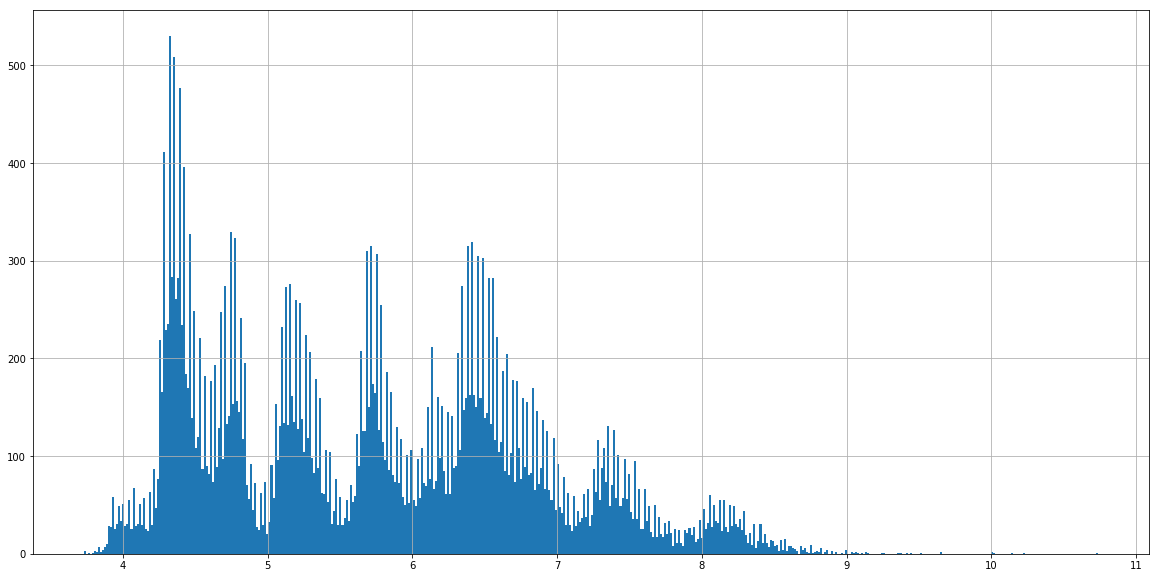

<Figure size 1440x720 with 0 Axes>

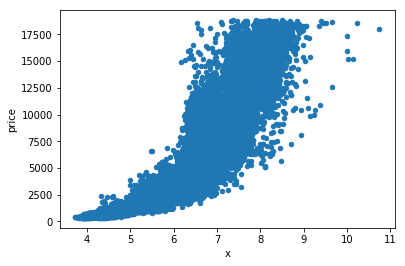

In [25]:
analysis('x')

In [26]:
count_limit('x', 4, 9, 1)

Pontos abaixo de 4 : 292.0 Porcentagem: 0.86 %
Pontos abaixo de 5 : 11051.0 Porcentagem: 32.59 %
Pontos abaixo de 6 : 19886.0 Porcentagem: 58.65 %
Pontos abaixo de 7 : 29416.0 Porcentagem: 86.76 %
Pontos abaixo de 8 : 32750.0 Porcentagem: 96.6 %
Pontos abaixo de 9 : 33904.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **x** acima de 9. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [27]:
# train = train[train['x'] < 9]

# analysis('x', hist=False)

#### y

In [28]:
train['y'].describe()

count    33929.000000
mean         5.730722
std          1.118862
min          3.680000
25%          4.720000
50%          5.710000
75%          6.530000
max         31.800000
Name: y, dtype: float64

Skewness: 0.7538922955405701
Kurtosis: 7.907805795324959


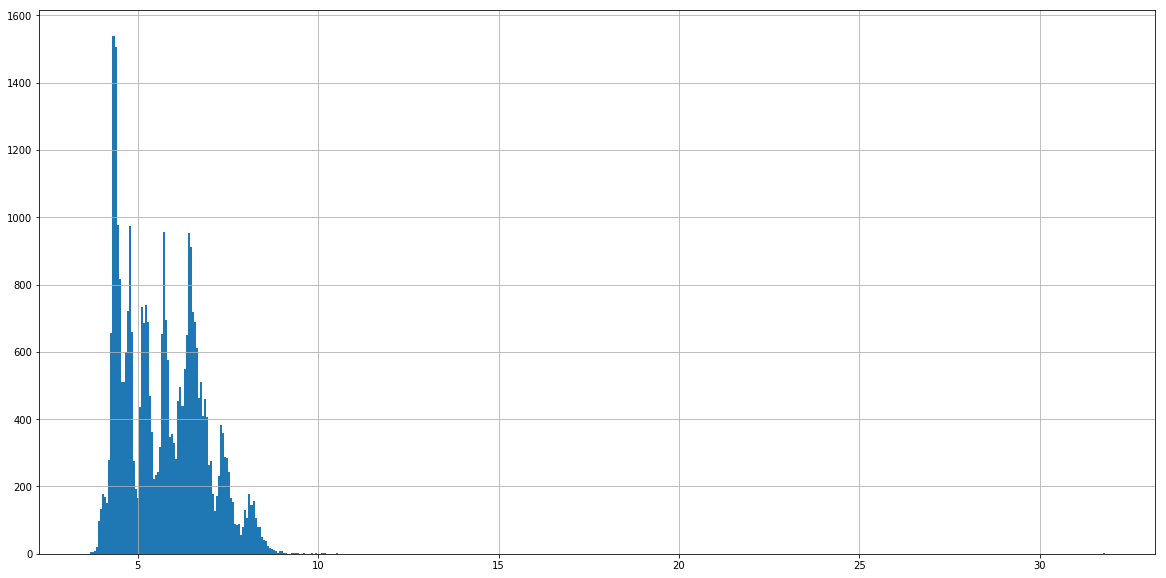

<Figure size 1440x720 with 0 Axes>

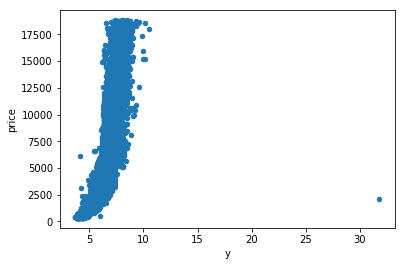

In [29]:
analysis('y')

In [30]:
count_limit('y', 5, 35, 5)

Pontos abaixo de 5 : 11044.0 Porcentagem: 32.55 %
Pontos abaixo de 10 : 33925.0 Porcentagem: 99.99 %
Pontos abaixo de 15 : 33928.0 Porcentagem: 100.0 %
Pontos abaixo de 20 : 33928.0 Porcentagem: 100.0 %
Pontos abaixo de 25 : 33928.0 Porcentagem: 100.0 %
Pontos abaixo de 30 : 33928.0 Porcentagem: 100.0 %
Pontos abaixo de 35 : 33929.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **y** acima de 10. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [31]:
# train = train[train['y'] < 10]

# analysis('y')

#### z

In [32]:
train['z'].describe()

count    33929.000000
mean         3.537062
std          0.690948
min          1.070000
25%          2.910000
50%          3.520000
75%          4.030000
max          6.980000
Name: z, dtype: float64

Skewness: 0.39476084546698736
Kurtosis: -0.6716881124170859


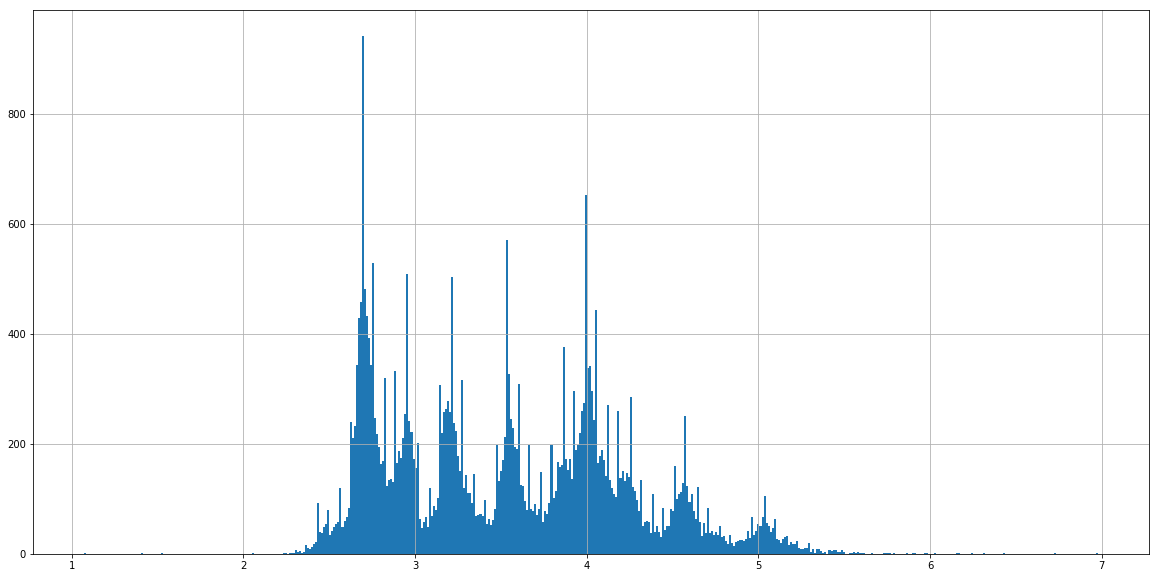

<Figure size 1440x720 with 0 Axes>

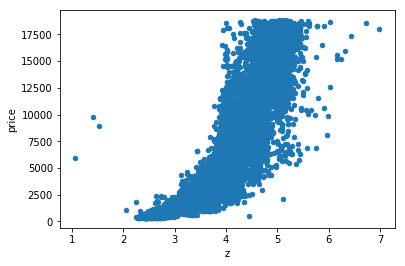

In [33]:
analysis('z')

In [34]:
count_limit('z', 1, 6, 0.5)

Pontos abaixo de 1.0 : 0.0 Porcentagem: 0.0 %
Pontos abaixo de 1.5 : 2.0 Porcentagem: 0.01 %
Pontos abaixo de 2.0 : 3.0 Porcentagem: 0.01 %
Pontos abaixo de 2.5 : 418.0 Porcentagem: 1.23 %
Pontos abaixo de 3.0 : 10410.0 Porcentagem: 30.69 %
Pontos abaixo de 3.5 : 16446.0 Porcentagem: 48.48 %
Pontos abaixo de 4.0 : 24190.0 Porcentagem: 71.31 %
Pontos abaixo de 4.5 : 30397.0 Porcentagem: 89.61 %
Pontos abaixo de 5.0 : 32955.0 Porcentagem: 97.16 %
Pontos abaixo de 5.5 : 33891.0 Porcentagem: 99.91 %
Pontos abaixo de 6.0 : 33920.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **z** abaixo de 2.2 e acima de 5.4. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [35]:
# train = train[train['z'] > 2.2]
# train = train[train['z'] < 5.4]

# analysis('z')

#### depth

In [36]:
train['depth'].describe()

count    33929.000000
mean        61.746754
std          1.425311
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

Skewness: -0.13595475750235045
Kurtosis: 5.467708844561626


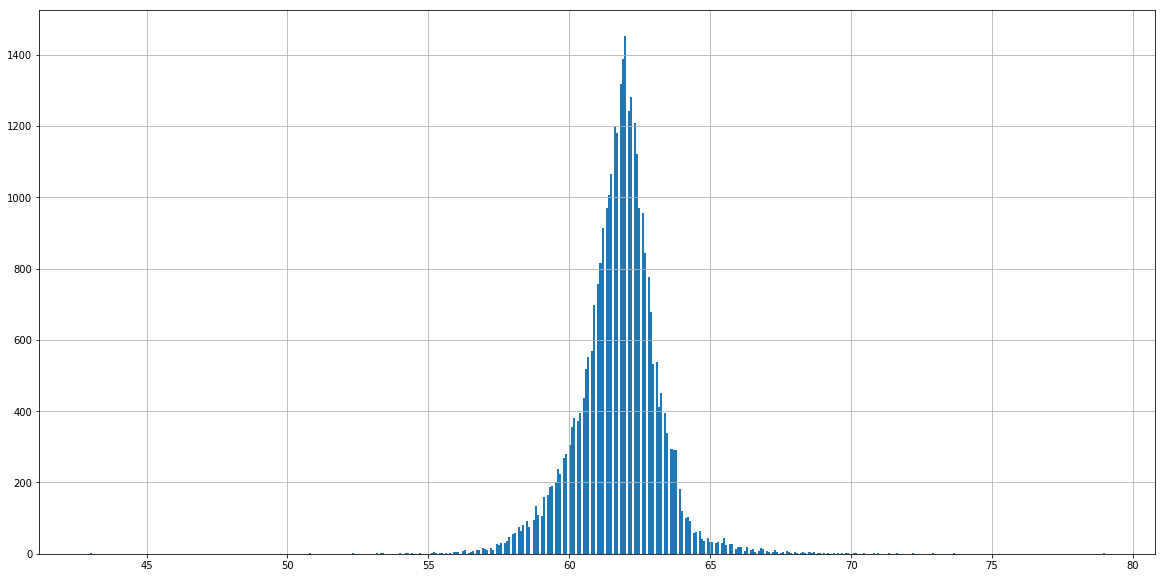

<Figure size 1440x720 with 0 Axes>

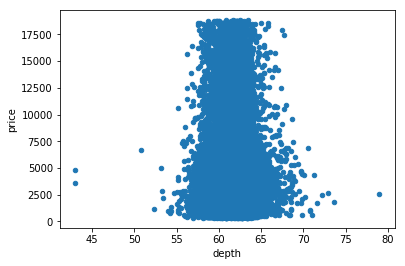

In [37]:
analysis('depth')

In [38]:
count_limit('depth', 45, 80, 5)

Pontos abaixo de 45 : 2.0 Porcentagem: 0.01 %
Pontos abaixo de 50 : 2.0 Porcentagem: 0.01 %
Pontos abaixo de 55 : 13.0 Porcentagem: 0.04 %
Pontos abaixo de 60 : 3216.0 Porcentagem: 9.48 %
Pontos abaixo de 65 : 33387.0 Porcentagem: 98.4 %
Pontos abaixo de 70 : 33917.0 Porcentagem: 99.96 %
Pontos abaixo de 75 : 33928.0 Porcentagem: 100.0 %
Pontos abaixo de 80 : 33929.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **depth** abaixo de 56 e acima de 67. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [39]:
# train = train[train['depth'] > 56]
# train = train[train['depth'] < 67]

# analysis('depth')

#### table

In [40]:
train['table'].describe()

count    33929.00000
mean        57.46752
std          2.23705
min         44.00000
25%         56.00000
50%         57.00000
75%         59.00000
max         95.00000
Name: table, dtype: float64

Skewness: 0.8158204615629009
Kurtosis: 3.4298697674709766


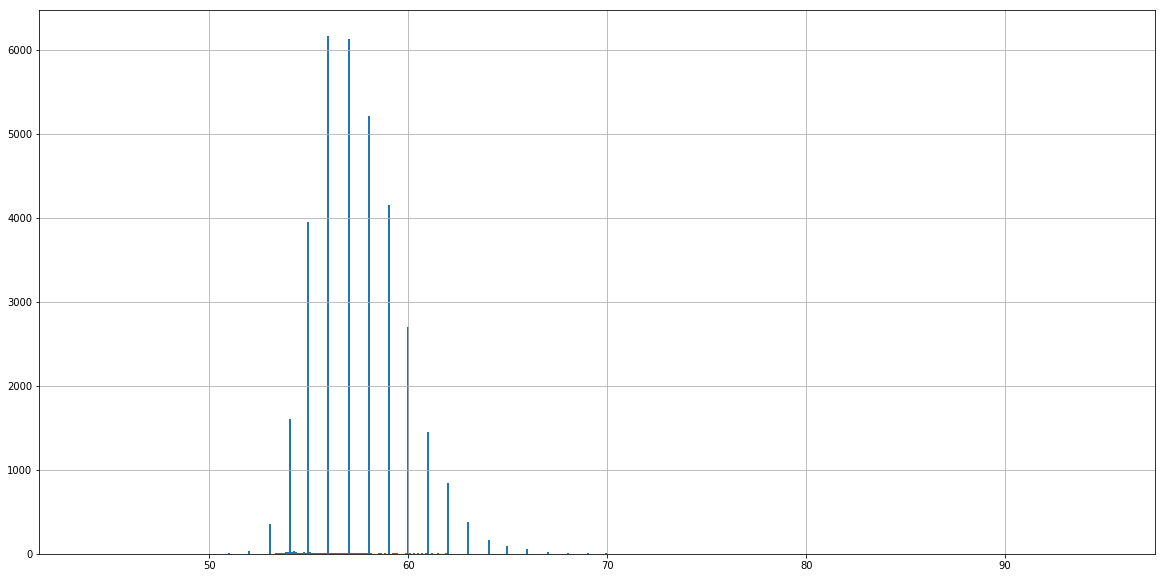

<Figure size 1440x720 with 0 Axes>

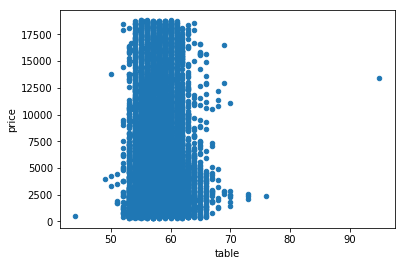

In [41]:
analysis('table')

In [42]:
count_limit('table', 45, 75, 5)

Pontos abaixo de 45 : 1.0 Porcentagem: 0.0 %
Pontos abaixo de 50 : 2.0 Porcentagem: 0.01 %
Pontos abaixo de 55 : 2236.0 Porcentagem: 6.59 %
Pontos abaixo de 60 : 28131.0 Porcentagem: 82.92 %
Pontos abaixo de 65 : 33739.0 Porcentagem: 99.45 %
Pontos abaixo de 70 : 33917.0 Porcentagem: 99.97 %
Pontos abaixo de 75 : 33927.0 Porcentagem: 100.0 %


##### Removendo os Outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, os outliers poderiam ser considerados com **table** abaixo de 56 e acima de 67. Porém, ao testar o modelo com a remoção deste dados, houve piora no desempenho geral, por isso, durante os testes finais, esta remoção foi desconsiderada e o código abaixo foi comentado.

In [43]:
# train = train[train['table'] > 56]
# train = train[train['table'] < 67]

# analysis('table')

### Outras Observações

Para visualizar todos os atributos numéricos e as relações entre eles, plotam-se vários gráficos de dispersão para evidenciar as dependências possíveis e, novamente, a matriz de correlações, para analisar a remoção de outliers caso ela seja aplicada.

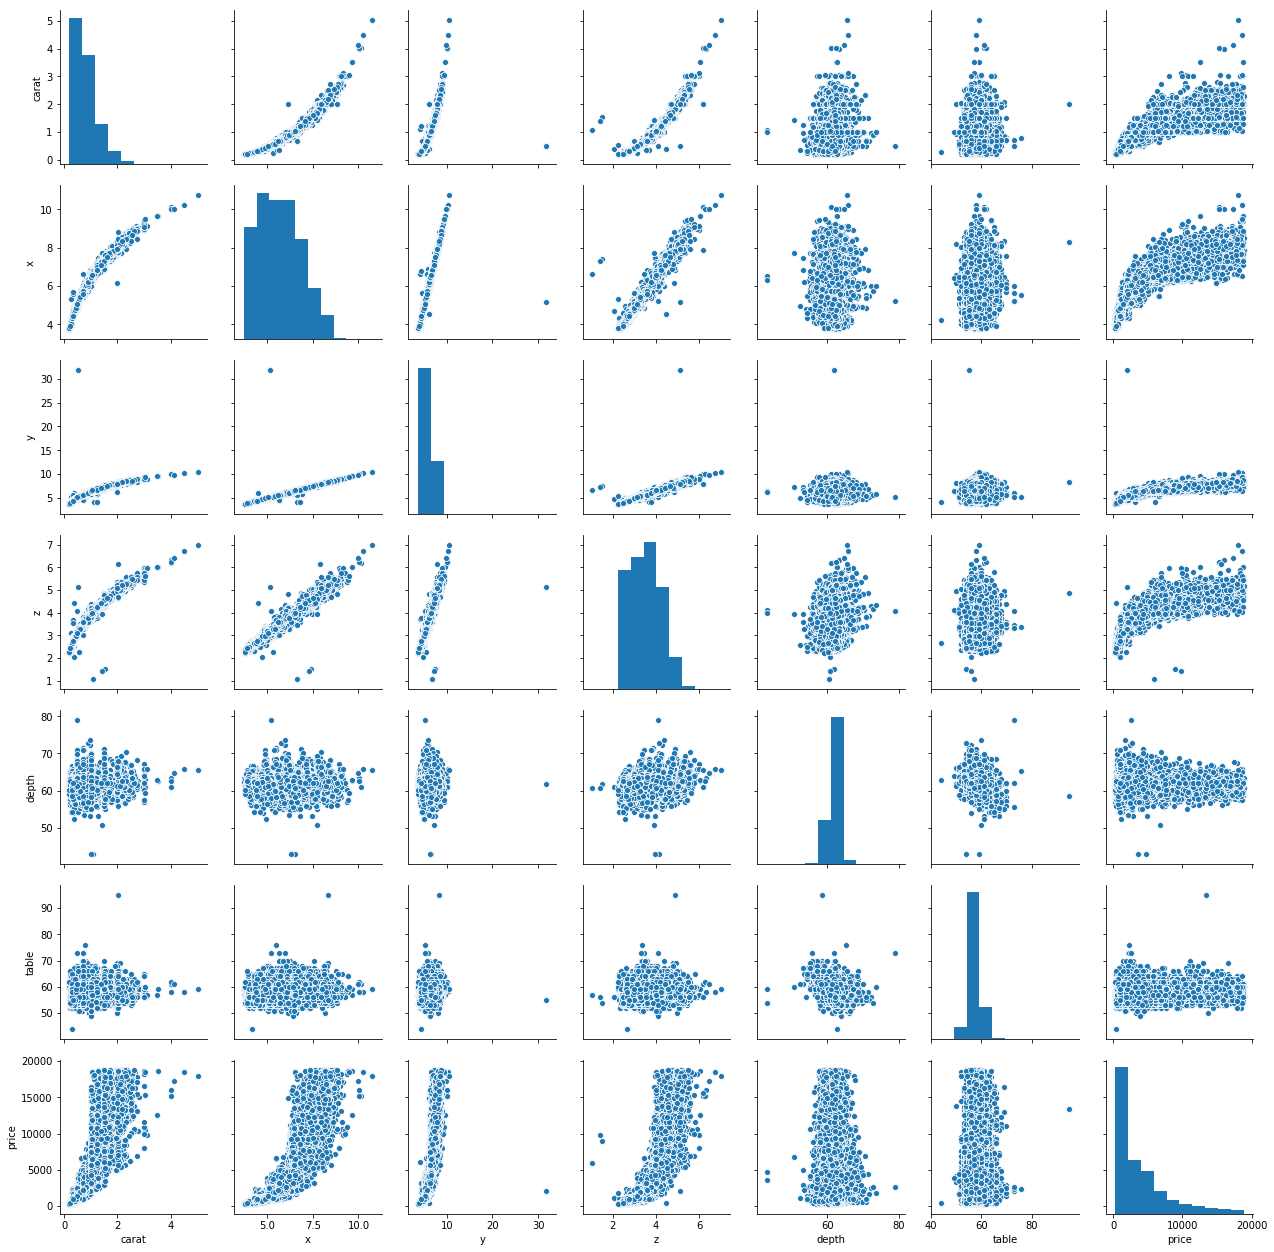

In [44]:
# Criando os graficos de dispersao para visualizacao geral

sns.pairplot(train)

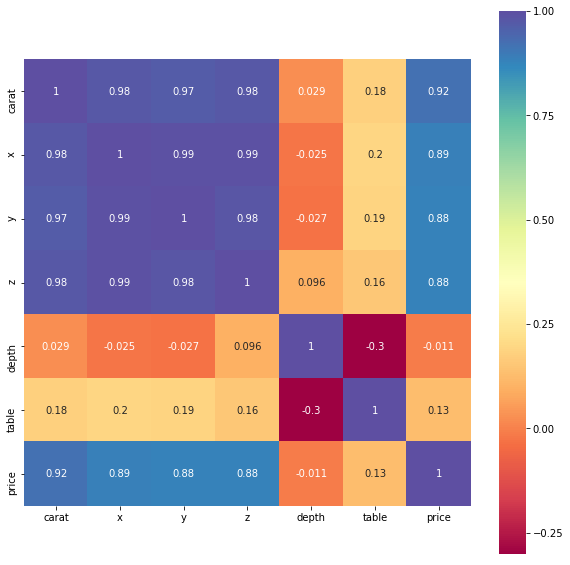

In [45]:
# Cria a matriz de correlacao entre os atributos numericos
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

### Atributos Categóricos

Para tratar os atributos categóricos, observou-se, inicialmente, a relação de cada uma das categorias com o preço e o tamanho da variância desta estimativa média.

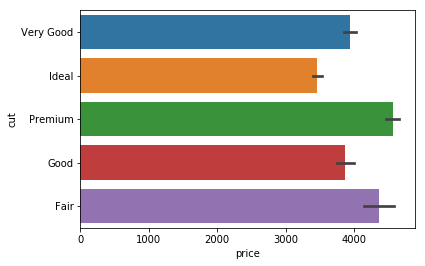

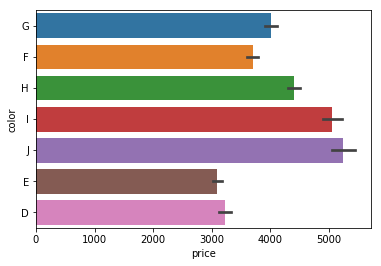

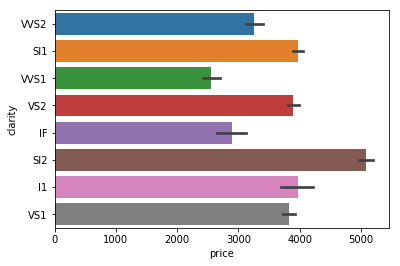

In [46]:
# Relacionando os atributos literais ao preco, com visualizacao

# Analisando a influencia de cut
sns.barplot(x = "price", y = "cut", data = train)
plt.show()

# Analisando a influencia de color
sns.barplot(x = "price", y = "color", data = train)
plt.show()

# Analisando a influencia de clarity
sns.barplot(x = "price", y = "clarity", data = train)
plt.show()

Como pode ser observado nos gráficos acima, as categorias de cada um dos atributos influenciam o preço de maneiras diferentes. As barras coloridas significam o valor estimado para cada opção e a linha ao final de cada barra informa a incerteza destas estimativas.

Por conta deste fenômeno, decidiu-se lidar com estes atributos da seguinte maneira:
1. Utilizando *Hot Enconding*, ou seja, dividindo cada um deles em novos atributos booleanos referentes às suas categorias através da função *get_dummies()*. Esta alternativa foi descartada e não está presente neste documento, pois todos os seus resultados apresentaram comportamento piorado em relação aos demais.
2. Substituindo cada uma das categorias por um valor inteiro que representasse a contribuição em relação ao preço. Ou seja, categorias com maior valor estimado de preço deveriam possuir maior valor inteiro de substituição e categorias com menor valor estimado, menor. Este procedimento foi realizado de duas maneiras diferentes:
> 1. Considerando valores de 1 até o número de categorias de cada atributo categórico;
> 2. Considerando as médias de preço por categoria.

As duas últimas opções foram escolhidas pois apresentaram melhores resultados e podem ser observadas abaixo:

In [47]:
# Numeros inteiros de 1 a numero de categorias do atributo
# Valores escolhidos de acordo com observacao dos graficos

# cut
cut_dict = {'Ideal'    : 1,
            'Good'     : 2,
            'Very Good': 3,
            'Fair'     : 4,
            'Premium'  : 5}

train['cut'] = train['cut'].replace(cut_dict)
test['cut']  = test['cut'].replace(cut_dict)


# color
color_dict = {'E': 1,
              'D': 2,
              'F': 3,
              'G': 4,
              'H': 5,
              'I': 6,
              'J': 7}

train['color'] = train['color'].replace(color_dict)
test['color']  = test['color'].replace(color_dict)


# clarity
clarity_dict = {'VVS1': 1,
                'IF'  : 2,
                'VVS2': 3,
                'VS1' : 4,
                'VS2' : 5,
                'SI1' : 6,
                'I1'  : 7,
                'SI2' : 8}

train['clarity'] = train['clarity'].replace(clarity_dict)
test['clarity']  = test['clarity'].replace(clarity_dict)


# Visualizando teste para checar funcionamento
test.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,5,4,6,7.75,7.68,4.84,62.7,58.0
1,1.11,3,5,6,6.63,6.65,4.11,61.9,58.0
2,0.52,1,2,3,5.19,5.22,3.20,61.5,55.0
3,1.05,1,6,5,6.52,6.50,4.05,62.2,56.0
4,0.70,1,6,3,5.63,5.68,3.51,62.1,58.0


In [48]:
# # Funcao de transformacao dos atributos categoricos
# # nas medias de preco por categoria

# def categ_feature(feature, data):
#     '''
#     Função de transformação dos atributos categóricos nas médias de preço de cada categoria.
    
#     Entrada : feature   - Atributo a ser analisado.
#               data      - Base de dados onde a transformação será realizada.
              
#     Saída   : mean_sort - Dicionário de atribuição das médias de preço para cada categoria.
#               data      - Base de dados transformada.
#     '''    
    
#     # define a media dos precos
#     mean = train.groupby(feature)['price'].mean()
#     mean_sort = mean.reset_index().sort_values(['price']).set_index([feature]).astype(int)
    
#     # transforma as relacoes de categoria e media respectiva em um dicionario
#     mean_sort.to_dict()
#     mean_sort = mean_sort['price']
    
#     # substitui as categorias por suas medias de preco
#     data[feature] = data[feature].replace(mean_sort, inplace = False)
    
#     return mean_sort, data

In [49]:
# # Aplicando a funcao para os dados de treino e teste

# # cut
# mean_sort_cut, train = categ_feature('cut', train)
# test['cut'] = test['cut'].replace(mean_sort_cut, inplace = False)

# #color
# mean_sort_color, train = categ_feature('color', train)
# test['color'] = test['color'].replace(mean_sort_color, inplace = False)

# #clarity
# mean_sort_clarity, train = categ_feature('clarity', train)
# test['clarity'] = test['clarity'].replace(mean_sort_clarity, inplace = False)

# # Visualizando teste para checar funcionamento
# test.head()

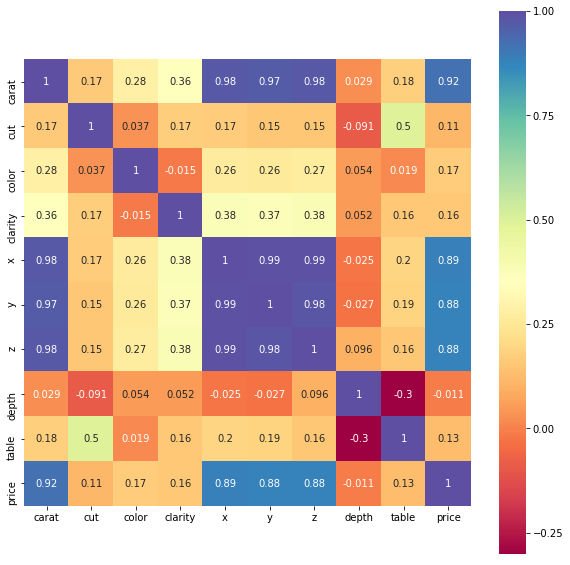

In [50]:
# Criando a matriz de correlacao novamente para analise
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

A partir da matriz de correlação, é possível observar que os dados transformados não possuem correlação alta com o preço. Entretanto, dependendo do modelo a ser aplicado, eles podem apresentar influências cruciais, provocando melhores métricas de ajuste fino do modelo, por exemplo.

# Treino e Análise de Resultados

## Preparação

Após aplicar todos os tratamentos e entender como cada atributo interage com o alvo, é necessário dividir o conjunto de treino em dois, um de treino e um de pseudo-teste, a fim de avaliar o comportamento de cada modelo para verificar qual é a melhor escolha para a aplicação em questão.  
É importante ressaltar que, para realizar esta separação, o conjunto de treino deve ser previamente separado em duas partes específicas: x, com todos os atributos, e y, com o alvo, como pode ser observado abaixo.

In [51]:
# Separando alvo e atributos
x = train.drop(['price'], axis = 1)
y = train['price']

# Criacao de conjuntos de treino e pseudo-teste
# a partir do conjunto geral de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size=0.3)

Cria-se, adicionalmente, um dicionário de comparação que irá armazenar todos os RMSPE analisados durante os próximos passos. Este dicionário servirá para demonstrar o modelo que gerou o melhor resultado.  

Além dele, criam-se também duas funções, uma responsável pelo cálculo do RMSPE, já que esta métrica não estava disponível nos modelos utilizados, e uma responsável pela análise de cada modelo, capaz de gerar o treinamento, predição e calcular as métricas de cada caso.

In [52]:
# Dicionario de referência para comparacao entre modelos
model_dict = {'Linear Regressor': 1,
              'Lasso Regression': 1,
              'Ridge Regression': 1,
              'AdaBoost Regression': 1,
              'Gradient Boosting Regression': 1,
              'Random Forest Regression': 1,
              'Extra Trees Regression': 1}

In [53]:
# Funcao que calcula o RMSPE para validacao dos modelos
def rmspe_score(y_test, y_pred):
    '''
    Função para calcular a métrica RMSPE.
    
    Entrada : y_test - Array de alvos, gabarito.
              y_pred - Array de alvos, previsto pelo modelo.
              
    Saída   : rmspe  - RMSPE da comparação.
    '''
    
    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis = 0))

    return rmspe

In [54]:
# Funcao de regressao generica, para varios modelos diferentes
def model_analysis(X_train, X_test, y_train, y_test, regressor, name):
    '''
    Função generalizada para análise de cada modelo de regressão.
    
    Entrada : X_train   - Conjunto de treino, atributos.
              X_test    - Conjunto de teste, atributos.
              y_train   - Conjunto de treino, alvo.
              y_test    - Conjunto de teste, alvo.
              regressor - Modelo sendo testado.
              name      - Nome do modelo testado.
              
    Saída   : Name      - Nome do modelo testado.
              Score     - Pontuação do modelo testado.
              MSE       - MSE do modelo testado.
              MAE       - MAE do modelo testado.
              RMSE      - RMSE do modelo testado.
              R2        - R2 do modelo testado.
              RMSPE     - RMSPE do modelo testado.
    '''
    
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('')
    print('###### {} ######'.format(name))
    print('Score : %.6f' % regressor.score(X_test, y_test))

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    rmspe = rmspe_score(y_test, y_pred)

    print('')
    print('MSE   : %0.6f ' % mse)
    print('MAE   : %0.6f ' % mae)
    print('RMSE  : %0.6f ' % rmse)
    print('R2    : %0.6f ' % r2)
    print('RMSPE : %0.6f ' % rmspe)
    
    model_dict[name] = round(rmspe, 6)

## Modelos Testados

A partir da preparação do ambiente, aplicam-se os mesmos dados para todos os regressores abaixo, comparando os scores e todas as métricas de erros. A métrica mais importante para este caso é o RMSPE, já que é considerada como avaliador durante a competição.

### Linear Regression

In [55]:
%%time

lr = LinearRegression()
model_analysis(X_train, X_test, y_train, y_test, lr, 'Linear Regressor')


###### Linear Regressor ######
Score : 0.901517

MSE   : 1554387.890560 
MAE   : 806.085542 
RMSE  : 1246.750934 
R2    : 0.901517 
RMSPE : 0.739535 
Wall time: 592 ms


### Lasso Regression

In [56]:
%%time

lar = Lasso(normalize = True)
model_analysis(X_train, X_test, y_train, y_test, lar, 'Lasso Regression')


###### Lasso Regression ######
Score : 0.890139

MSE   : 1733969.560359 
MAE   : 836.359696 
RMSE  : 1316.802780 
R2    : 0.890139 
RMSPE : 0.553080 
Wall time: 77.8 ms


### Ridge Regression

In [57]:
%%time

rr = Ridge(normalize = True)
model_analysis(X_train, X_test, y_train, y_test, rr, 'Ridge Regression')


###### Ridge Regression ######
Score : 0.799085

MSE   : 3171089.951095 
MAE   : 1142.106206 
RMSE  : 1780.755444 
R2    : 0.799085 
RMSPE : 0.483945 
Wall time: 165 ms


### AdaBoost Regression

In [58]:
%%time

abr = AdaBoostRegressor(random_state = 2)
model_analysis(X_train, X_test, y_train, y_test, abr, 'AdaBoost Regression')


###### AdaBoost Regression ######
Score : 0.919645

MSE   : 1268270.423040 
MAE   : 871.986156 
RMSE  : 1126.175130 
R2    : 0.919645 
RMSPE : 0.669976 
Wall time: 1.06 s


### Gradiente Boosting Regression

In [59]:
%%time

gbr = GradientBoostingRegressor(n_estimators = 200, min_samples_leaf = 2, \
                                min_samples_split = 5, \
                                max_depth = 10, random_state = 2)
model_analysis(X_train, X_test, y_train, y_test, gbr, 'Gradient Boosting Regression')


###### Gradient Boosting Regression ######
Score : 0.979846

MSE   : 318092.619016 
MAE   : 277.866854 
RMSE  : 563.997003 
R2    : 0.979846 
RMSPE : 0.091436 
Wall time: 14.2 s


### Random Forest Regression

In [60]:
%%time

rfr = RandomForestRegressor(n_estimators = 250, n_jobs = 2, random_state = 2)
model_analysis(X_train, X_test, y_train, y_test, rfr, 'Random Forest Regression')


###### Random Forest Regression ######
Score : 0.980798

MSE   : 303072.960419 
MAE   : 278.160645 
RMSE  : 550.520627 
R2    : 0.980798 
RMSPE : 0.096114 
Wall time: 11.1 s


### Extra Trees Regression

In [61]:
%%time

etr = ExtraTreesRegressor(n_estimators = 1000, n_jobs = -1, random_state = 2)
model_analysis(X_train, X_test, y_train, y_test, etr, 'Extra Trees Regression')


###### Extra Trees Regression ######
Score : 0.981144

MSE   : 297613.643041 
MAE   : 274.049600 
RMSE  : 545.539772 
R2    : 0.981144 
RMSPE : 0.098128 
Wall time: 16.7 s


### Comparação

In [62]:
compare = pd.DataFrame()

# exibe o dicionario de comparação entre o RMSPE
# de cada um dos modelos testados e disponibiliza de
# forma crescente
compare['Model'] = model_dict.keys()
compare['RMSPE'] = model_dict.values()

compare = compare.set_index('Model').sort_values(['RMSPE'])
compare

,RMSPE
Model,
Gradient Boosting Regression,0.091436
Random Forest Regression,0.096114
Extra Trees Regression,0.098128
Ridge Regression,0.483945
Lasso Regression,0.553080
AdaBoost Regression,0.669976
Linear Regressor,0.739535


Como o modelo que apresentou menor RMSPE foi o *Gradient Boosting Regressor*, o mesmo foi selecionado para sofrer otimizações de parâmetros e ser retestado a cada nova descoberta, como pode ser observado nos passos a seguir.

## Otimização de Parâmetros

A partir da escolha do modelo, pesquisas relacionadas e dados empíricos, definiram-se parâmetros iniciais para aplicar dois métodos de otimização e validação cruzada considerando 3 combinações diferentes dos conjuntos de dados:
1. Random Search;
2. Grid Search.

### Random Search

In [63]:
# Definindo a grid para aplicar RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(500, 2500, 5)]
max_features = [7, 8, 9]
max_depth = [10, 12, 14]
min_samples_split = [2, 3, 4]
min_samples_leaf = [2, 4, 6]
bootstrap = [True]
random_state = [2]
learning_rate = [round(float(x), 3) for x in np.linspace(0.01, 0.15, 15)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state,
               'learning_rate': learning_rate}

random_grid

{'n_estimators': [500, 1000, 1500, 2000, 2500],
 'max_features': [7, 8, 9],
 'max_depth': [10, 12, 14],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [2, 4, 6],
 'random_state': [2],
 'learning_rate': [0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15]}

In [62]:
# Aplicando RandomizedSearchCV ao Gradient Boosting Regressor

# Random search com 100 iterações
gbr = GradientBoostingRegressor()
gbr_rs = RandomizedSearchCV(estimator = gbr, 
                            param_distributions = random_grid, 
                            n_iter = 100, 
                            cv = 3, 
                            verbose = 2, 
                            random_state = 2, 
                            n_jobs = -1,
                            scoring = make_scorer(rmspe_score, \
                                                  greater_is_better = False)
)

# Treina o modelo com 100 possibilidades aleatorias dentro do conjunto
# definido pelo random_grid
gbr_rs.fit(x, y)

# Dentro destes treinamentos, define o que apresentou melhor resultado
gbr_rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 113.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 261.1min finished


{'random_state': 2,
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 8,
 'max_depth': 10,
 'learning_rate': 0.04}

A partir dos parâmetros resultantes do método de Random Search, cria-se uma nova grid em torno destes valores para gerar um novo conjunto de teste. Este conjunto será responsável pela avaliação do método de Grid Search.

### Grid Search

In [56]:
# De acordo com os resultados da RandomizedSearch,
# seto os parametros da param_grid em torno deles
# para descobrir o melhor de todos
x = train.drop(['price'], axis = 1)
y = train['price']

param_grid = {
    'learning_rate': [0.02, 0.04, 0.05],
    'max_depth': [10],
    'max_features': [7, 8, 9],
    'min_samples_leaf': [2],
    'min_samples_split': [5, 6],
    'n_estimators': [300, 500, 700, 1000],
    'random_state': [2]
}

gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(estimator = gbr, 
                        param_grid = param_grid, 
                        cv = 3,
                        verbose = 2,
                        n_jobs = -1,
                        scoring = make_scorer(rmspe_score, \
                                              greater_is_better = False)
)

# Treina o modelo com todas as combinacoes
# do conjunto de param_grid
gbr_grid.fit(x, y)

# Define os melhores parametros pro Gradient
# Boosting Regressor dentro deste conjunto
gbr_grid.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 94.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 141.9min finished


{'learning_rate': 0.02,
 'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000,
 'random_state': 2}

### Verificação dos Parâmetros

Após a definição dos parâmetros otimizados para o modelo escolhido, é necessário aplicá-los aos conjuntos de treino e pseudo-teste para verificação e, posteriormente, gerar o preditor para o conjunto de teste real.

Este passo sofreu diversas alterações durante o desenvolvimento do modelo e está de acordo com a última submissão da autora, em que são utilizados os parâmetros resultantes do *Grid Search*, sem tratamento de outliers e com atributos categóricos substituídos por números inteiros variando de 1 ao número de categorias de cada um.

#### Avaliação do Modelo

In [64]:
%%time

gbr = GradientBoostingRegressor(learning_rate = 0.02, max_depth = 10, \
                                max_features = 7, \
                                min_samples_leaf = 2, min_samples_split = 5, \
                                n_estimators = 1000, random_state = 2)

model_analysis(X_train, X_test, y_train, y_test, gbr, 'Gradient Boosting Regression')


###### Gradient Boosting Regression ######
Score : 0.980995

MSE   : 299954.264518 
MAE   : 270.458491 
RMSE  : 547.680805 
R2    : 0.980995 
RMSPE : 0.089367 
Wall time: 2min 10s


#### Arquivo Submetido

In [256]:
%%time
x = train.drop(['price'], axis = 1)
y = train['price']

gbr = GradientBoostingRegressor(learning_rate = 0.02, max_depth = 10, \
                                max_features = 7, \
                                min_samples_leaf = 2, min_samples_split = 5, \
                                n_estimators = 1000, random_state = 2)

gbr.fit(x, y)
y_pred = gbr.predict(test)

submission = pd.DataFrame({'id':test.index, 'price':y_pred})

submission.to_csv('data/submission.csv', index = False)

Wall time: 32.1 s


# Conclusão

O trabalho foi de extrema importância para desenvolver o conhecimento sobre o assunto e gerou motivação para a realização de um bom modelo. Com o aprendizado obtido a partir dele, foi possível conceber novas ideias de Aprendizado de Máquina e definir métricas de melhoria para trabalhos futuros, onde se verificariam a robustez e capacidade de generalização do modelo de forma ainda mais específica, utilizando métricas de verificação da variação durante a validação cruzada, etc.  

O resultado obtido pelo código da maneira como ele se encontra, porém, não foi o melhor de todos. Durante alguns dos testes, a autora trocou os parâmetros de *min_samples_leaf* e *min_samples_split* erroneamente e, nestas condições, o modelo apresentou o melhor resultado possível e conseguiu atingir o primeiro lugar, público e privado, na competição (na primeira data de término, às 0h de 13/07). Porém, como ele foi gerado por uma confusão e não estava de acordo com a lógica desenvolvida, preferiu-se removê-lo deste relatório e das submissões consideradas pela avaliação privada.  

Uma solução possível para incluí-lo na lógica deste documento seria colocar a combinação de parâmetros dentro do conjunto considerado pelo *Grid Search* e rodá-lo novamente para verificar se ele se encaixaria na melhor escolha de parâmetros possível. Entretanto, como não houve tempo hábil para realizar este ajuste antes que a competição acabasse, esta solução será aplicada posteriormente, para melhoria do modelo.